In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

mpl.style.use('seaborn')

## Step 1: load data

In [2]:
path = 'data1.csv'
data = pd.read_csv(path)

## step 2: process data 
* The dataset is clean enough, don't need to preprocess

## Step 3: statistic analysis

In [3]:
# 查看各属性的近20年的最大值、最小值、平均值、标准差
data.describe(percentiles=[]).T

,count,mean,std,min,50%,max
x1,20.0,5.579520e+06,1.262195e+06,3831732.000,5308896.500,7599295.000
x2,20.0,7.650350e+02,5.956983e+02,181.540,565.940,2110.780
x3,20.0,2.370825e+03,1.919167e+03,448.190,1586.020,6882.850
x4,20.0,1.964469e+04,1.020302e+04,7571.000,15943.375,42049.140
x5,20.0,1.587095e+04,8.199771e+03,6212.700,12345.705,33156.830
x6,20.0,7.350514e+06,6.213419e+05,6370241.000,7314304.000,8323096.000
x7,20.0,1.712239e+03,1.184714e+03,525.710,1262.050,4454.550
x8,20.0,5.705799e+03,4.478400e+03,985.310,4104.585,15420.140
x9,20.0,1.294935e+02,5.050983e+01,60.620,113.530,228.460
x10,20.0,3.402165e+02,2.515779e+02,65.660,235.760,852.560


In [4]:
# 相关分析,初步判断因变量与解释变量之间是否有相关性
np.round(data.corr(method='pearson'), 2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.00,0.95,0.95,0.97,0.97,0.99,0.95,0.97,0.98,0.98,-0.29,0.94,0.96,0.94
x2,0.95,1.00,1.00,0.99,0.99,0.92,0.99,0.99,0.98,0.98,-0.13,0.89,1.00,0.98
x3,0.95,1.00,1.00,0.99,0.99,0.92,1.00,0.99,0.98,0.99,-0.15,0.89,1.00,0.99
x4,0.97,0.99,0.99,1.00,1.00,0.95,0.99,1.00,0.99,1.00,-0.19,0.91,1.00,0.99
x5,0.97,0.99,0.99,1.00,1.00,0.95,0.99,1.00,0.99,1.00,-0.18,0.90,0.99,0.99
x6,0.99,0.92,0.92,0.95,0.95,1.00,0.93,0.95,0.97,0.96,-0.34,0.95,0.94,0.91
x7,0.95,0.99,1.00,0.99,0.99,0.93,1.00,0.99,0.98,0.99,-0.15,0.89,1.00,0.99
x8,0.97,0.99,0.99,1.00,1.00,0.95,0.99,1.00,0.99,1.00,-0.15,0.90,1.00,0.99
x9,0.98,0.98,0.98,0.99,0.99,0.97,0.98,0.99,1.00,0.99,-0.23,0.91,0.99,0.98
x10,0.98,0.98,0.99,1.00,1.00,0.96,0.99,1.00,0.99,1.00,-0.17,0.90,0.99,0.99


#### 结论一：居民消费价格指数（x1）与财政收入呈负相关，其余变量与财政收入显著正相关

Text(0.5, 1.0, 'Fiscal revenue growth graph')

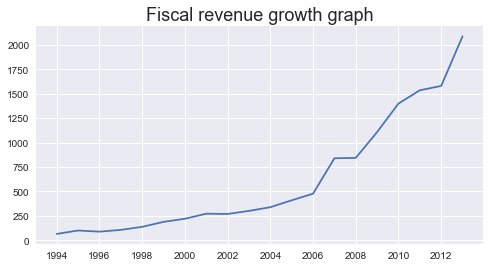

In [5]:
# 财政收入增长曲线图
fig, ax = plt.subplots(figsize=(8, 4))

data['y'].plot(ax=ax)

ax.set_xticks(range(0, 20, 2))
ax.set_xticklabels(pd.period_range('1994', periods=20, freq='Y')[::2])
ax.set_title('Fiscal revenue growth graph', fontsize=18)

#### 结论二：财政收入增长明显

## Step 4: build model

In [6]:
# First, Select relating attributes by Lasso Model
lasso_model = Lasso(alpha=1)
lasso_model.fit(data.iloc[:,0:13], data['y'])

corr_result = pd.Series(np.round(lasso_model.coef_, 2), index = ['x'+str(i) for i in range(1, 14)])
print(corr_result)

x1    -0.00
x2    -0.32
x3     0.43
x4    -0.03
x5     0.08
x6     0.00
x7     0.24
x8    -0.04
x9    -2.55
x10    0.44
x11    5.69
x12   -0.00
x13   -0.04
dtype: float64


C:\Users\liu68\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16962.561833894746, tolerance: 705.2629842279999
  positive)


#### 结论三：社会从业人数、年末总人口、第三产业与第二产业产值比等因素的系数为0,剔除。

In [7]:
# data.drop(labels=['x1', 'x6', 'x12'], axis=1, inplace=True)

In [8]:
data.index = range(1994, 2014)

In [9]:
# 建立灰度预测模型
def GM11(x0):
    """This is grey forecasting function"""
    x1 = x0.cumsum() 
    z1 = (x1[:len(x1)-1] + x1[1:])/2.0 
    z1 = z1.reshape((len(z1),1))
    B = np.append(-z1, np.ones_like(z1), axis = 1)
    Yn = x0[1:].reshape((len(x0)-1, 1))
    [[a],[b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Yn) 
    f = lambda k: (x0[0]-b/a)*np.exp(-a*(k-1))-(x0[0]-b/a)*np.exp(-a*(k-2))
    delta = np.abs(x0 - np.array([f(i) for i in range(1,len(x0)+1)]))
    C = delta.std()/x0.std()
    P = 1.0*(np.abs(delta - delta.mean()) < 0.6745*x0.std()).sum()/len(x0)
    return f, a, b, x0[0], C, P 

In [10]:
# 预测2014， 2015相对应的值各个属性的值
data.loc[2014] = None
data.loc[2015] = None

features = ['x2', 'x3', 'x4', 'x5', 'x7', 'x8', 'x9', 'x10', 'x11', 'x13']
for item in features:
    f = GM11(data[item][:20].values)[0]
    data.loc[2014, item] = f(len(data)-1)
    data[item][2015] = f(len(data))
    data[item] = data[item].round(2)
    
# print(data[features+['y']])

In [11]:
## prepare data for tarining
data_train = data.iloc[:20, :]
data_mean = data_train.mean()
data_std = data_train.std()

data_train = (data_train - data_mean) / data_train.std()
x_train = data_train[features].values
y_train = data_train['y'].values

In [12]:
## 建立浅层神经网络模型 神经节点 10-16-4-1
nn_model = Sequential()

# nn_model.add(Dense(10, activation='sigmoid'， ),)
nn_model.add(Dense(16, activation='relu', input_shape=(10,)))
nn_model.add(Dense(4, activation='sigmoid'))
nn_model.add(Dense(1))

nn_model.compile(loss='mean_squared_error', optimizer='adam')


In [13]:
# training model
nn_model.fit(x_train, y_train, epochs=2000, batch_size=4, verbose=0)
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [14]:
x = ((data[features] - data_mean[features]) / data_std[features]).values
data['y_pred'] = nn_model.predict(x) * data_std['y'] + data_mean['y']

## Step 5: visiualize result

2014    2098.618164
2015    2331.381348
Name: y_pred, dtype: float32


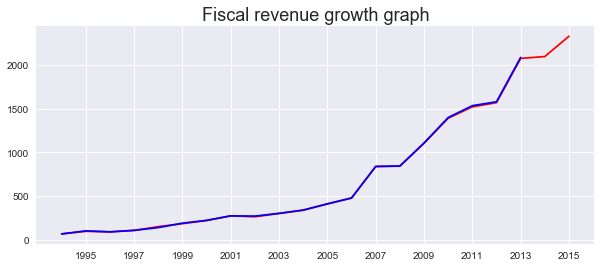

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))

data['y_pred'].plot(ax=ax, color='r')

data['y'].plot(ax=ax, color='b')

ax.set_title('Fiscal revenue growth graph', fontsize=18)
tick = ax.set_xticks(range(1995, 2016, 2))
print(data['y_pred'][-2:])

#### 分析结论4：收入增长如图所示，红线的前段部分与蓝线重合的很好，说明模型已经学到了数据集中的特征，但训练次数为5000，存在这过拟合的风险。

## 分析脑图

!['aa'](fiscal_mindmap.png)